In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [58]:
X_train_data = np.load('X_kannada_MNIST_train.npz')
X_train = X_train_data['arr_0']


In [59]:
y_train_data = np.load('y_kannada_MNIST_train.npz')
y_train = y_train_data['arr_0']



In [60]:
X_test_data = np.load('X_kannada_MNIST_test.npz')
X_test = X_test_data['arr_0']


In [61]:
y_test_data = np.load('y_kannada_MNIST_test.npz')
y_test = y_test_data['arr_0']

In [62]:
X_train.shape

(60000, 28, 28)

In [63]:
y_train.shape

(60000,)

In [64]:
X_test.shape

(10000, 28, 28)

In [65]:
y_test.shape

(10000,)

In [66]:
X_train_reshape = X_train.reshape(X_train.shape[0], 784)
X_test_reshape = X_test.reshape(X_test.shape[0], 784)


In [67]:
X_train_reshape.shape

(60000, 784)

In [68]:
X_train_reshape

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [69]:
X_test_reshape

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [70]:
x_train = pd.DataFrame(X_train_reshape)
x_test = pd.DataFrame(X_test_reshape)


In [71]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# ploting the hand written image randomly

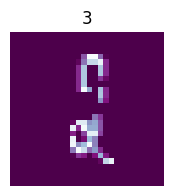

In [73]:
def plot_random_digit():
  random_index = np.random.randint(0,X_train.shape[0])
  plt.imshow(X_train[random_index], cmap='BuPu_r')
  plt.title(y_train[random_index])
  plt.axis('off')
plt.figure(figsize=[2,2])
plot_random_digit()

## performing PCA to 10 components.

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
x_train_pca = pd.DataFrame(x_train_pca)
x_test_pca = pd.DataFrame(x_test_pca)



In [75]:
x_train_pca

,0,1,2,3,4,5,6,7,8,9
0,603.287389,-265.967035,29.543662,-322.436448,297.646157,124.942753,-101.677455,-39.965697,381.332872,-189.008191
1,298.508133,-97.544711,53.100186,-549.039382,42.397934,-313.884260,-219.932159,244.153027,253.523859,262.111560
2,-425.622132,646.150293,433.611542,-152.565426,162.645038,195.830417,43.470292,-399.943062,346.630803,-130.391054
3,-343.828551,100.668002,-415.924147,-8.475557,-103.484220,152.590637,-97.551169,-270.169702,-17.708433,158.099281
4,-96.056315,3.559549,-516.642321,125.603759,22.234701,80.748861,69.576457,-86.965082,158.147550,179.330662
...,...,...,...,...,...,...,...,...,...,...
59995,-210.913972,384.412622,741.318044,144.939543,-227.950934,1.596378,337.705968,56.481245,-338.295620,-5.841628
59996,-411.839794,45.667391,127.140929,-205.791681,-377.400769,-242.383229,121.546480,-321.884927,151.253834,65.442470
59997,-568.865920,5.946051,470.637692,-351.492937,-287.227878,-116.223763,75.674583,-223.129459,149.773370,-164.441806
59998,771.742006,-105.780775,296.497040,460.837466,-471.928763,-82.595569,-108.269762,-84.123411,72.425096,88.790496


In [76]:
x_test_pca

,0,1,2,3,4,5,6,7,8,9
0,279.360126,-604.630883,-176.073700,-322.233139,749.389215,-77.954067,196.884276,238.545603,455.396676,-307.709416
1,68.689928,-153.316912,-59.930144,-475.454343,305.784725,-400.451374,21.663485,304.069003,471.053771,-31.115761
2,-173.920116,-101.756115,-158.921132,139.191028,564.141615,-69.119699,138.637586,398.382704,681.500046,253.965941
3,-258.215996,62.586274,-502.918560,-5.866688,390.685865,14.026907,-170.656707,109.693231,242.261436,-162.384338
4,-145.295071,51.349037,-517.376481,123.802213,140.385017,106.642105,156.062277,-316.240876,244.997339,151.598009
...,...,...,...,...,...,...,...,...,...,...
9995,34.943982,102.682976,-382.821673,274.524091,-39.779376,-123.498205,235.024271,195.610971,48.340131,-78.111280
9996,-508.251359,-177.757939,-130.085847,23.492916,-105.807623,139.529492,-38.971995,-70.577855,89.528164,358.880328
9997,-541.203959,27.851915,55.253689,-84.463233,292.481126,184.927909,-75.154304,51.659074,85.748849,-0.828358
9998,648.876441,-49.691579,161.244608,-162.879385,-336.360028,37.126663,260.009023,-25.906383,51.619807,135.451891


# Normalizing  the data

In [77]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(x_train_pca)
transformed_train_data = mm.transform(x_train_pca)
transformed_test_data = mm.transform(x_test_pca)
x_pca_train_trans = pd.DataFrame(transformed_train_data)
x_pca_test_trans = pd.DataFrame(transformed_test_data)

In [78]:
x_pca_train_trans.describe()

,0,1,2,3,4,5,6,7,8,9
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.494385,0.352083,0.393206,0.441502,0.426626,0.469482,0.433478,0.429815,0.481131,0.493026
std,0.169977,0.137099,0.170133,0.142874,0.128648,0.133335,0.129757,0.135459,0.126747,0.123058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.364023,0.263934,0.253560,0.345211,0.349896,0.369759,0.337730,0.331175,0.395554,0.410082
50%,0.503940,0.335521,0.385296,0.443890,0.429621,0.464256,0.432737,0.423817,0.479394,0.494776
75%,0.618434,0.405256,0.525669,0.535897,0.508290,0.568330,0.527379,0.521743,0.560789,0.576992
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## • K-NN Classifier model

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn_pca = KNeighborsClassifier()
params = {'n_neighbors': range(3,10),
          'weights':['uniform', 'distance'],
          'metric':['manhattan','eculidean','cosine']}
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
skf = StratifiedKFold(n_splits = 5)

rcv_knn = RandomizedSearchCV(knn_pca, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv_knn.fit(x_pca_train_trans, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['manhattan', 'eculidean',
                                                   'cosine'],
                                        'n_neighbors': range(3, 10),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [80]:
rcv_knn.best_params_

{'weights': 'uniform', 'n_neighbors': 7, 'metric': 'manhattan'}

In [81]:
rcv_knn.best_score_

0.9427833333333332

In [82]:
finalmodel_knn_mnist = knn_pca.set_params(**rcv_knn.best_params_)
finalmodel_knn_mnist.fit(x_pca_train_trans, y_train)
knnpreds_mnist = finalmodel_knn_mnist.predict(x_pca_test_trans)

## Evaluation (KNN)

Precision: 0.8803409356093189
Recall: 0.8763
F1-score: 0.8752243214776858
Confusion Matrix:
[[767 170   2  29   6   0   1   1  17   7]
 [ 18 939   0  19   5   1   0   1  10   7]
 [  5   1 978   1   0   9   1   4   1   0]
 [ 11  16   1 872  27  28   3  20  19   3]
 [  0   1   0  14 948  26   1   1   4   5]
 [  0   3   2  10 119 849   2   3   6   6]
 [  2   6   0  47  24  10 834  64   0  13]
 [  8  11   0  66  27   3 151 701   5  28]
 [ 15   5   2   0   5   8   4   0 956   5]
 [  4  11   0   2  26   1   8   2  27 919]]
AUC : 0.972112946111111


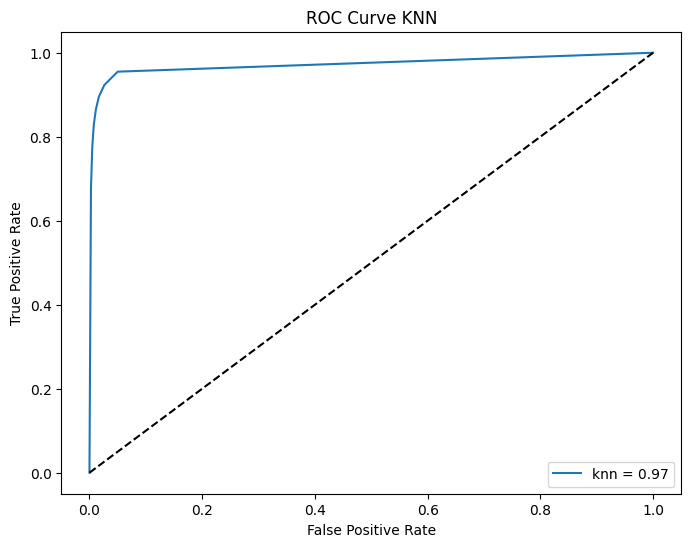

In [83]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, knnpreds_mnist,average = 'macro')
recall = recall_score(y_test, knnpreds_mnist,average = 'macro')
f1 = f1_score(y_test, knnpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,knnpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

#calculate AUC

from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_knn = finalmodel_knn_mnist.predict_proba(x_pca_test_trans)
fpr_knn,tpr_knn,thersholds_knn = roc_curve(y_test_bin.ravel(),predict_proba_knn.ravel())
auc = auc(fpr_knn,tpr_knn)

print("AUC :", auc)

# plotting ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'knn = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN')
plt.legend(loc='lower right')
plt.show()

## DECISION TREES

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
model =  DecisionTreeClassifier()

params = {'criterion':['gini','entropy'],
          'splitter':['best','random'],
          'max_depth':range(3,50),
          }

skf = StratifiedKFold(n_splits = 5)

rcv_dt = RandomizedSearchCV(model, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv_dt.fit(x_pca_train_trans, y_train)

rcv_dt.best_score_


0.8898666666666667

In [85]:
rcv_dt.best_params_

{'splitter': 'best', 'max_depth': 11, 'criterion': 'entropy'}

In [86]:
finalmodel_dt_mnist = model.set_params(**rcv_dt.best_params_)
finalmodel_dt_mnist.fit(x_pca_train_trans, y_train)
dtpreds_mnist = finalmodel_dt_mnist.predict(x_pca_test_trans)

## EVALUATION (DECISION TREE)

Precision: 0.807360724633934
Recall: 0.8042000000000001
F1-score: 0.8036943648938646
Confusion Matrix:
[[700 163  11  50   6   1   3   4  40  22]
 [ 81 808   2  25   6   9   3   4  38  24]
 [  5   1 917  22   5  20  10  11   7   2]
 [ 17  13   0 810  28  25  20  56  22   9]
 [  1   1   8  44 864  41   2   8  12  19]
 [  5  10   4  20 145 771   8   7  15  15]
 [  6  14   3  68  15  20 778  71  11  14]
 [  7  12   8  70  43   6 141 668  16  29]
 [ 44  26   6   2  11   5   3   5 889   9]
 [ 17  30   0   8  32   3   5  10  58 837]]
AUC: 0.9393527422222221


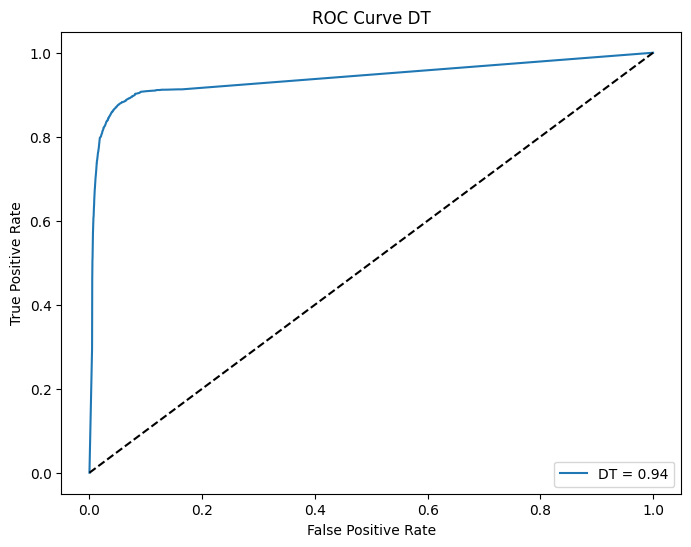

In [87]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, dtpreds_mnist,average = 'macro')
recall = recall_score(y_test, dtpreds_mnist,average = 'macro')
f1 = f1_score(y_test, dtpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,dtpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_dt =  finalmodel_dt_mnist.predict_proba(x_pca_test_trans)
fpr_dt,tpr_dt,thersholds_dt = roc_curve(y_test_bin.ravel(),predict_proba_dt.ravel())
auc = auc(fpr_dt,tpr_dt)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'DT = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve DT')
plt.legend(loc='lower right')
plt.show()


## RANDOM FOREST

# On non- normalized data

Precision: 0.8779098105301315
Recall: 0.8753
F1-score: 0.8746864287642566
Confusion Matrix:
[[781 157   1  29   4   1   2   3  17   5]
 [ 30 913   0  19   4   5   1   3  17   8]
 [  4   2 983   3   0   5   0   2   1   0]
 [ 12   8   2 886  19  19   6  30  15   3]
 [  0   2   0  25 923  32   2   1   9   6]
 [  0   2   2  10 114 856   3   3   6   4]
 [  1   7   1  54  14  25 819  60   2  17]
 [  7  10   0  41  21   1 134 748  11  27]
 [ 17  16   3   6   3   6   1   0 944   4]
 [  6  10   0   4  20   0   4   4  52 900]]
AUC: 0.9900012161111109


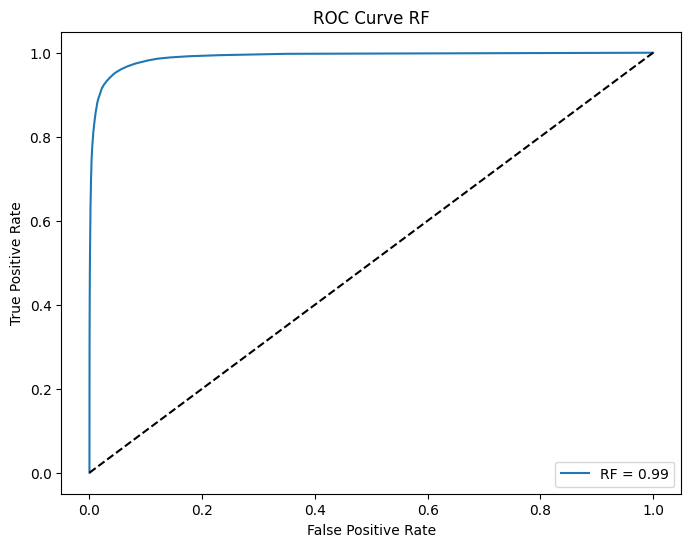

In [88]:
from sklearn.ensemble import RandomForestClassifier

rf_mnist = RandomForestClassifier()
rf_mnist.fit(x_train_pca, y_train)
rfpreds_mnist = rf_mnist.predict(x_test_pca)


## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, rfpreds_mnist,average = 'macro')
recall = recall_score(y_test, rfpreds_mnist,average = 'macro')
f1 = f1_score(y_test, rfpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,rfpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = rf_mnist.predict_proba(x_test_pca)
fpr_rf,tpr_rf,thersholds_rf = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_rf,tpr_rf)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RF')
plt.legend(loc='lower right')
plt.show()


# On Normalized data

Precision: 0.8779690957135801
Recall: 0.8748000000000001
F1-score: 0.8741696955478313
Confusion Matrix:
[[775 153   4  30   4   0   2   3  20   9]
 [ 29 909   0  24   6   3   0   2  15  12]
 [  4   2 980   3   0   7   0   3   1   0]
 [ 10  10   1 886  18  19  10  28  16   2]
 [  0   2   0  26 924  28   3   2   9   6]
 [  0   3   0  10 117 851   6   4   5   4]
 [  1   8   2  50  12  22 837  49   2  17]
 [  4  12   1  43  24   0 127 743  12  34]
 [ 18  15   2   2   3   4   2   0 950   4]
 [  6  13   0   4  18   0   6   4  56 893]]
AUC: 0.990056585


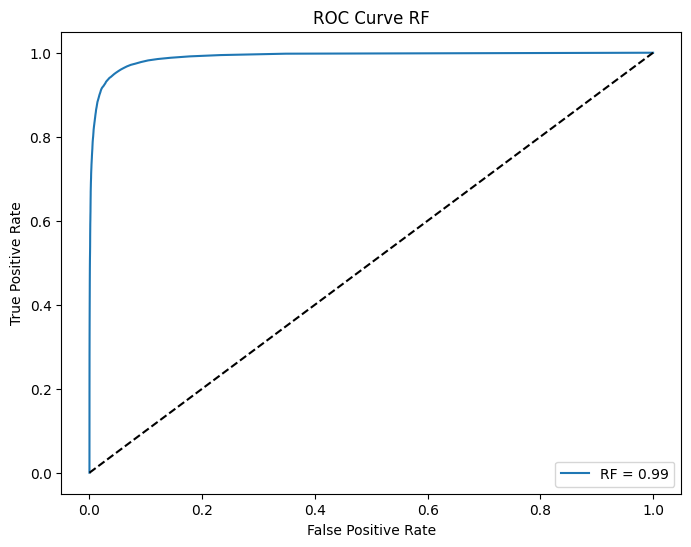

In [89]:
from sklearn.ensemble import RandomForestClassifier

rf_mnist = RandomForestClassifier()
rf_mnist.fit(x_pca_train_trans, y_train)
rfpreds_mnist = rf_mnist.predict(x_pca_test_trans)


## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, rfpreds_mnist,average = 'macro')
recall = recall_score(y_test, rfpreds_mnist,average = 'macro')
f1 = f1_score(y_test, rfpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,rfpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = rf_mnist.predict_proba(x_pca_test_trans)
fpr_rf,tpr_rf,thersholds_rf = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_rf,tpr_rf)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RF')
plt.legend(loc='lower right')
plt.show()


# OPTIMIZED MODEL

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
rf_mnist = RandomForestClassifier()

params = {'criterion':['gini','entropy'],
          'n_estimators': range(1,10),
          'max_features':['sqrt', 'log2', None]
          # 'max_depth':range(3,50),
          }



skf = StratifiedKFold(n_splits = 10)

rcv = RandomizedSearchCV(rf_mnist, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv.fit(x_pca_train_trans, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': range(1, 10)},
                   scoring='accuracy')

In [91]:
rcv.best_params_

{'n_estimators': 9, 'max_features': 'log2', 'criterion': 'entropy'}

In [92]:
rcv.best_score_

0.9308166666666666

In [93]:
finalmodel_rf = rf_mnist.set_params(**rcv.best_params_)
finalmodel_rf.fit(x_pca_train_trans, y_train)
rfpreds_mnist = finalmodel_rf.predict(x_pca_test_trans)

Precision: 0.8603002440616893
Recall: 0.8573999999999999
F1-score: 0.8566614457075769
Confusion Matrix:
[[780 151   2  31   2   2   3   2  18   9]
 [ 52 884   1  23   5   4   2   2  19   8]
 [  5   2 974   3   1   6   3   6   0   0]
 [ 17  16   5 870  24  20  12  26   9   1]
 [  0   1   0  31 910  43   2   1   7   5]
 [  0   5   1  17 127 831   4   2   6   7]
 [  3  11   5  58  17  29 810  52   4  11]
 [  9  10   4  65  29   8 142 699   5  29]
 [ 30  16   9   4   4   4   3   0 926   4]
 [  6  18   1   7  14   1   5   5  53 890]]
AUC: 0.9738384216666667


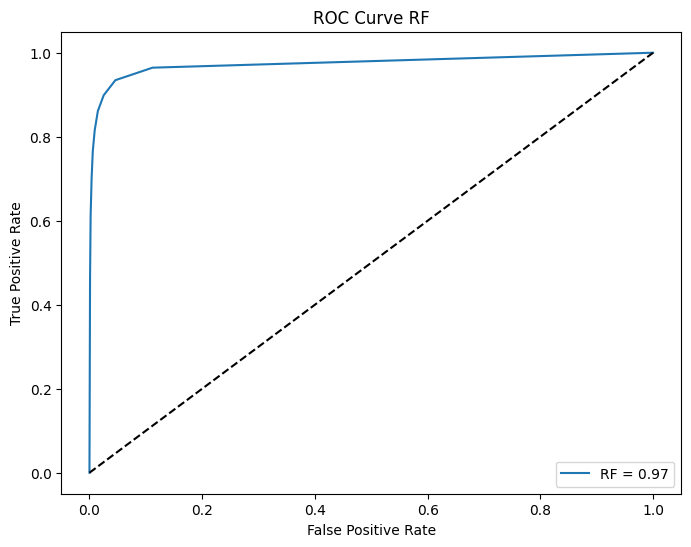

In [94]:
## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, rfpreds_mnist,average = 'macro')
recall = recall_score(y_test, rfpreds_mnist,average = 'macro')
f1 = f1_score(y_test, rfpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,rfpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = finalmodel_rf.predict_proba(x_pca_test_trans)
fpr_rf,tpr_rf,thersholds_rf = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_rf,tpr_rf)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RF')
plt.legend(loc='lower right')
plt.show()

## Naive Bayes

Precision: 0.7792685802802165
Recall: 0.7723
F1-score: 0.7709180134235358
Confusion Matrix:
[[608 229  16  70   8   0   2  13  45   9]
 [ 26 748   9 121   8   2   0   0  66  20]
 [  9   1 967   3   0  15   1   3   1   0]
 [ 13   7   2 844  32  16  21  64   0   1]
 [  1   1   1  38 872  43   1   8  28   7]
 [  0   2  15  47 165 731   6  16  12   6]
 [  5   9  50  30  25  44 729  95   3  10]
 [  9  17   4  80  50   1 177 650   2  10]
 [ 89  36  26   6   4   3   2   4 822   8]
 [ 19  28   1   8  62   0   3  21 106 752]]
AUC: 0.9704934088888889


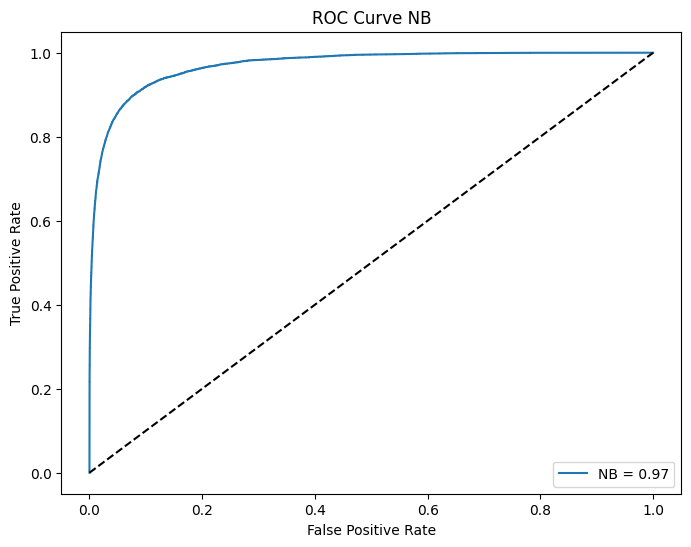

In [95]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_pca_train_trans, y_train)

predictions_nb = naive_bayes.predict(x_pca_test_trans)

## Evaluation

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions_nb,average = 'macro')
recall = recall_score(y_test, predictions_nb,average = 'macro')
f1 = f1_score(y_test, predictions_nb,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,predictions_nb)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = naive_bayes.predict_proba(x_pca_test_trans)
fpr_nb,tpr_nb,thersholds_nb = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_nb,tpr_nb)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'NB = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve NB')
plt.legend(loc='lower right')
plt.show()


## SVM

Precision: 0.8911441868705507
Recall: 0.8878
F1-score: 0.8873146410326445
Confusion Matrix:
[[810 139   1  24   6   0   1   2  14   3]
 [ 20 923   0  27   1   3   1   5  11   9]
 [  3   1 984   1   0   6   0   3   1   1]
 [  9  11   0 880  20  22  11  30  17   0]
 [  0   1   0  15 948  23   0   0   5   8]
 [  0   3   0   4 124 854   3   3   5   4]
 [  0   9   1  40  21  28 851  37   0  13]
 [  4  14   0  28  19   3 136 753   7  36]
 [ 10  14   3   0   3   4   4   0 958   4]
 [  2  13   0   1  21   0   6   2  38 917]]
AUC: 0.9704934088888889


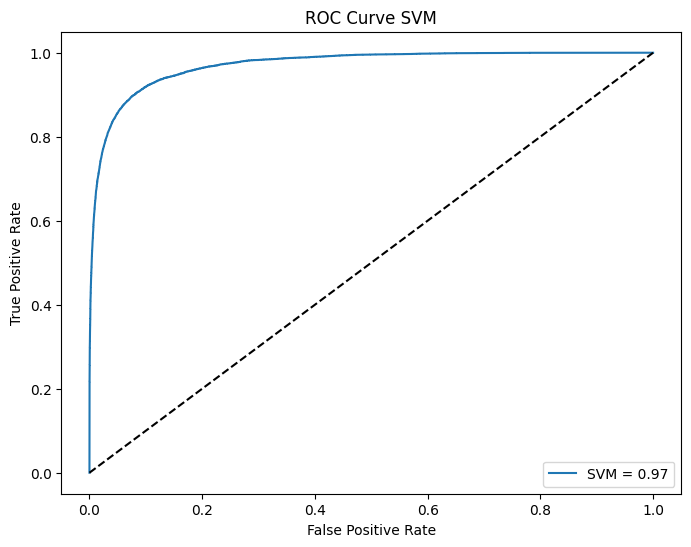

In [96]:
from sklearn.svm import SVC

svc_mnist= SVC(probability = True)
svc_mnist.fit(x_pca_train_trans, y_train)
predictions_svc = svc_mnist.predict(x_pca_test_trans)

## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions_svc,average = 'macro')
recall = recall_score(y_test, predictions_svc,average = 'macro')
f1 = f1_score(y_test, predictions_svc,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,predictions_svc)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_svc = svc_mnist.predict_proba(x_pca_test_trans)
fpr_svc,tpr_svc,thersholds_svc = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_svc,tpr_svc)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, label=f'SVM = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVM')
plt.legend(loc='lower right')
plt.show()